<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/Task_02/02_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **02:Data Cleaning and Preprocessing**

---



**2.1: Import Libraries**





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


**2.2: Load Dataset**





In [2]:
url="https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("\n=== Data set overview ===")
print(f"Dataset shape: {df.shape}")  # (rows, columns)

✅ Dataset loaded successfully!

=== Data set overview ===
Dataset shape: (7043, 21)


**2.3: Initial Inspection**





In [3]:
# First look at the data
print("==== FIRST 5 ROWS ====\n")
display(df.head())

==== FIRST 5 ROWS ====



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("\n==== Dataset Info ====\n")
df.info()


==== Dataset Info ====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [5]:
print("\n===== SUMMARY STATS =====")
df.describe(include="all")


===== SUMMARY STATS =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**2.4: Basic Column Fixes**





In [6]:
# Convert Total Charges to numeric values
#Turning Invalid Values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#count invalid rows
invalid_rows = df['TotalCharges'].isnull().sum()
print(f"Number of invalid rows in 'TotalCharges': {invalid_rows}")

#Removing Invalid Rows
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

print("\n----- Shape after dropping invalid rows -----")
print("Dataset New Shape:",df.shape)

Number of invalid rows in 'TotalCharges': 11

----- Shape after dropping invalid rows -----
Dataset New Shape: (7032, 21)


In [7]:
# Remove Duplicate Values
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"Number of duplicate rows removed: {before - after}")

Number of duplicate rows removed: 0


In [8]:
# Dropping CustomerID as it's not a predective feature
def exclude_useless(df):
    if 'customerID' in df.columns:
        df = df.drop('customerID', axis=1)
        print("Dropping customerID (as it's not useful for modeling)")
    else:
        print("customerID column not found, likely already dropped.")
    return df

df = exclude_useless(df)

print("\n----- Shape after dropping customerID -----")
print("Dataset New Shape:",df.shape,"\n")

# Quick look over dataset
df.head()


Dropping customerID (as it's not useful for modeling)

----- Shape after dropping customerID -----
Dataset New Shape: (7032, 20) 



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Convert Binary Yes/No columns to 0/1

# 1) Finding yes/no columns
binary_cols = [col for col in df.columns
               if df[col].nunique() == 2 and
               sorted(df[col].unique().tolist()) == ['No','Yes']]


#2) converting them to 0/1
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1,'No': 0})

print("\n✅ All binary columns encoded to 0/1!")
print("\nConverted binary columns: ", binary_cols)

print("\nQuick look on Data set after conversion:\n")
df.head(10)


✅ All binary columns encoded to 0/1!

Converted binary columns:  ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Quick look on Data set after conversion:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [10]:
# Fix Internet-Dependant Columns
# As many columns contains "No Internet Service" -> will be treated as 0

# 1) Finding columns with this - "No internet service" as a unique value
cols_with_no_internet_service = []
for col in df.columns:
    if 'No internet service' in df[col].unique():
        cols_with_no_internet_service.append(col)

print(f"Columns containing 'No internet service': {cols_with_no_internet_service}")

# 2) Converting "No internet service" to "No" in these columns
for col in cols_with_no_internet_service:
    df[col] = df[col].replace({'No internet service':'No'})
    df[col] = df[col].map({'Yes': 1,'No': 0})

print(f"\n✅ Converted 'No internet service' to 'No' in columns: {cols_with_no_internet_service}")

# Now, let's verify a few columns if they are updated
print("\nQuick look on Data set after conversion (first 5 rows):\n")
display(df[cols_with_no_internet_service].head())

Columns containing 'No internet service': ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

✅ Converted 'No internet service' to 'No' in columns: ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

Quick look on Data set after conversion (first 5 rows):



,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0


In [11]:
# Fix MultipleLines
# "No phone service" -> same as "No" coverting them to 0

df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No"})
df["MultipleLines"] = df["MultipleLines"].map({"Yes": 1, "No": 0})


**2.5: Outlier Analysis**





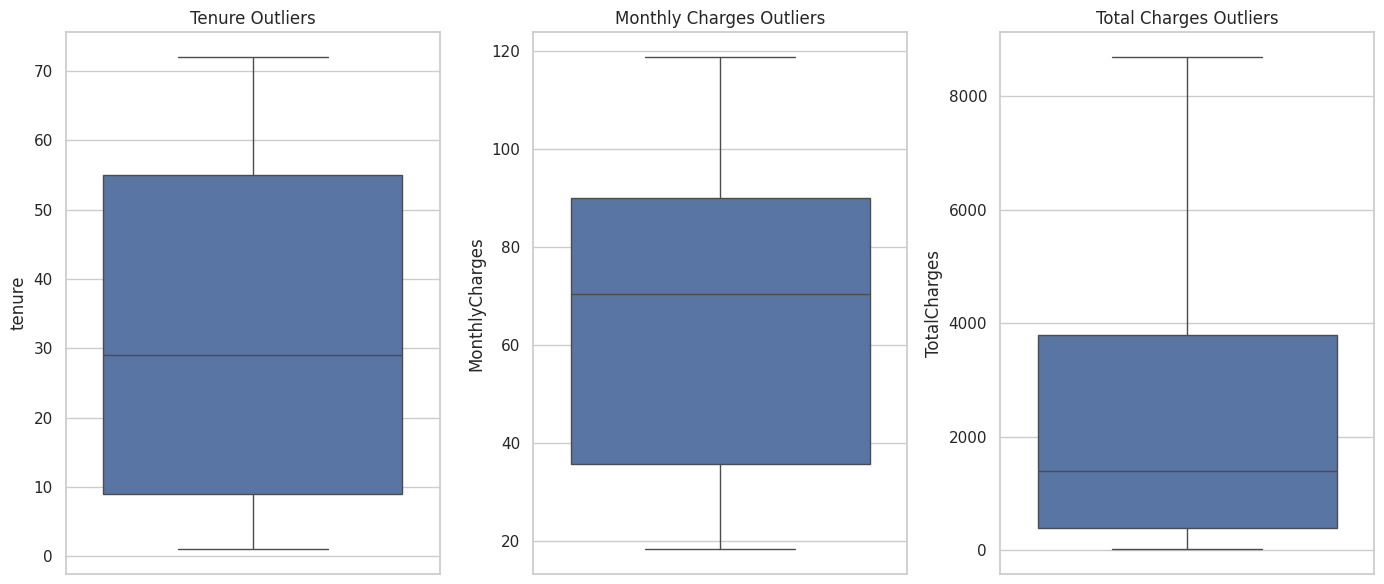


Outliers were inspected but not removed, as they represent real customer behaviour.


In [12]:
# Boxplots for Outlier Inspection
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(y=df["tenure"])
plt.title("Tenure Outliers")

plt.subplot(1,3,2)
sns.boxplot(y=df["MonthlyCharges"])
plt.title("Monthly Charges Outliers")

plt.subplot(1,3,3)
sns.boxplot(y=df["TotalCharges"])
plt.title("Total Charges Outliers")

plt.tight_layout()
plt.show()

print("\nOutliers were inspected but not removed, as they represent real customer behaviour.")


**2.5: Feature Engineering**

In [13]:
# Tenure Groups
bins = [0,12,24,48,60,72]
labels = ["0-12","13-24","25-48","49-60","61-72"]
df["TenureGroup"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

print("\n✅Tenure groups created!")
df["TenureGroup"].value_counts()




✅Tenure groups created!


,count
TenureGroup,
0-12,2175
25-48,1594
61-72,1407
13-24,1024
49-60,832


In [14]:
## 2. Monthly Charge Groups
df["MonthlyChargeGroup"] = pd.cut(df["MonthlyCharges"],
                                  bins=[0,35,70,100,200],
                                  labels=["Low","Medium","High","Very High"],
                                  include_lowest=True)

print("\n✅ Monthly charge groups created!")
df["MonthlyChargeGroup"].value_counts()




✅ Monthly charge groups created!


,count
MonthlyChargeGroup,
High,2679
Low,1729
Medium,1722
Very High,902


In [15]:
# Derived Features

# Charges Ratio (This will avoid division by zero)
df["ChargesRatio"] = df["TotalCharges"] / (df["MonthlyCharges"] + 1)
print("\n✅Charges ratio created!")

# Service Count
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServiceCount'] = df[service_cols].sum(axis=1)
print("\n✅ Service Count created!")
print("\nQuick look at ServiceCount:\n")
display(df[['ServiceCount']].head())



✅Charges ratio created!

✅ Service Count created!

Quick look at ServiceCount:



,ServiceCount
0,1
1,3
2,3
3,3
4,1


In [16]:
# TenureMonths Category: Seniority Flag
df["IsLongTermCustomer"] = (df["tenure"] >= 24).astype(int)
print("\n✅Seniority flag created!")
print("\nQuick look at IsLongTermCustomer:\n")
display(df[['IsLongTermCustomer']].head())


✅Seniority flag created!

Quick look at IsLongTermCustomer:



,IsLongTermCustomer
0,0
1,1
2,0
3,1
4,0


In [17]:
#AutoPay Feature (PaymentMethod grouping)
df["IsAutoPay"] = df["PaymentMethod"].isin([
    "Bank transfer (automatic)",
    "Credit card (automatic)"
]).astype(int)
print("\n✅AutoPay flag created!")
print("\nQuick look at IsAutoPay:\n")
display(df[['IsAutoPay']].head())


✅AutoPay flag created!

Quick look at IsAutoPay:



,IsAutoPay
0,0
1,0
2,0
3,1
4,0


In [18]:
# HasInternet Flag
df["HasInternet"] = (df["InternetService"] != "No").astype(int)
print("\n✅HasInternet flag created!")
print("\nQuick look at HasInternet:\n")
display(df[['HasInternet']].head())


✅HasInternet flag created!

Quick look at HasInternet:



,HasInternet
0,1
1,1
2,1
3,1
4,1


In [19]:
print("\n✅Feature engineering completed Successfully!")
print(f"\nDataset new shape: {df.shape}\n")
df.head()


✅Feature engineering completed Successfully!

Dataset new shape: (7032, 27)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,ChargesRatio,ServiceCount,IsLongTermCustomer,IsAutoPay,HasInternet
0,Female,0,1,0,1,0,0,DSL,0,1,...,29.85,29.85,0,0-12,Low,0.967585,1,0,0,1
1,Male,0,0,0,34,1,0,DSL,1,0,...,56.95,1889.50,0,25-48,Medium,32.605695,3,1,0,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,53.85,108.15,1,0-12,Medium,1.971741,3,0,0,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,42.30,1840.75,0,25-48,Medium,42.511547,3,1,1,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,70.70,151.65,1,0-12,High,2.115063,1,0,0,1


**2.6: Final Cleaning Summary**





In [20]:
# check weather if there any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
TenureGroup           0
MonthlyChargeGroup    0
ChargesRatio          0
ServiceCount          0
IsLongTermCustomer    0
IsAutoPay             0
HasInternet           0
dtype: int64


In [21]:
print("\n===== FINAL CLEANING SUMMARY =====")

print("Final dataset shape:", df.shape)

# Define categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

print("\nCategorical features:", categorical_cols)
print("\nNumerical features:", numerical_cols)

print("\nClass distribution:\n")
class_dist = pd.DataFrame({
    "Count": df["Churn"].value_counts(),
    "Percentage (%)": (df["Churn"].value_counts(normalize=True) * 100).round(2)
})
class_dist


===== FINAL CLEANING SUMMARY =====
Final dataset shape: (7032, 27)

Categorical features: ['gender', 'InternetService', 'Contract', 'PaymentMethod']

Numerical features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureGroup', 'MonthlyChargeGroup', 'ChargesRatio', 'ServiceCount', 'IsLongTermCustomer', 'IsAutoPay', 'HasInternet']

Class distribution:



,Count,Percentage (%)
Churn,,
0,5163,73.42
1,1869,26.58


**2.7: Saving Cleaned Dataset**

In [22]:
# Saving Clean DataSet
cleaned_file = 'Cleaned_Telco_Customer_Churn.csv'
df.to_csv(cleaned_file, index=False)
print("✅ Cleaned dataset saved successfully as", cleaned_file,"!")

✅ Cleaned dataset saved successfully as Cleaned_Telco_Customer_Churn.csv !
